<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Milestone%20Projects/Milestone_Project_3_Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-28 19:51:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-03-28 19:51:26 (90.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
dataset = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = 
                      [ 'Date'],index_col = ['Date'])

In [4]:
dataset

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
dataset.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
len(dataset)

2787

In [8]:
bitcoin_prices = pd.DataFrame(dataset['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})

In [9]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, '1 Oct 2018 to 18 May 2021')

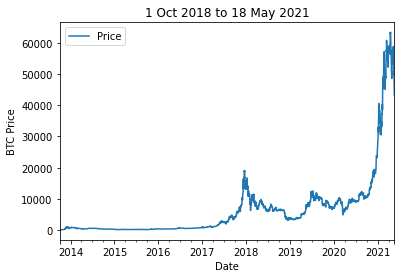

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("1 Oct 2018 to 18 May 2021")

<Axes: xlabel='Date'>

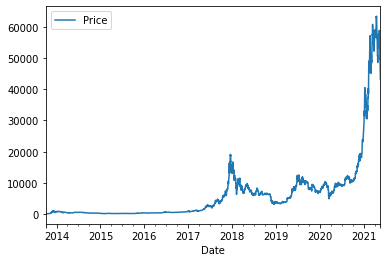

In [11]:
bitcoin_prices.plot()

### Importing with CSV Module

In [12]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open ("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  reader = csv.reader(f,delimiter = ",")
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

In [13]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

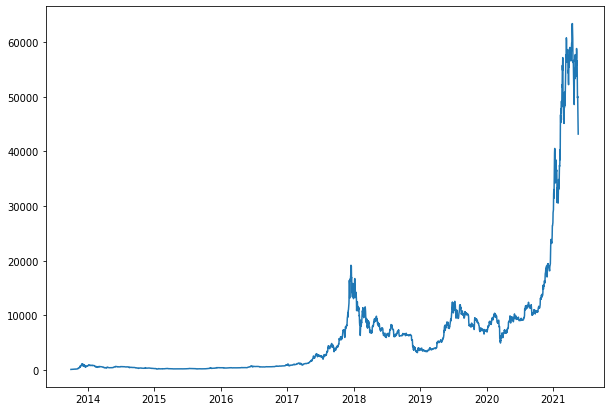

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)

### Creating train and test sets with time series data (Wrong Way)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [17]:
timesteps,prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [18]:
x_train,x_test,y_train,y_test = train_test_split(timesteps,prices,test_size = 0.2)

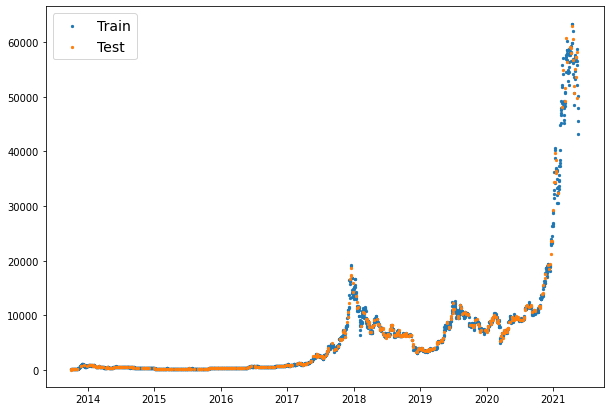

In [19]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating splits for time series (right way)

In [20]:
split_size = int(0.8*len(prices))
x_train,y_train = timesteps[:split_size],prices[:split_size]
x_test,y_test  = timesteps[split_size:],prices[split_size:]

In [21]:
len(x_train),len(x_test)

(2229, 558)

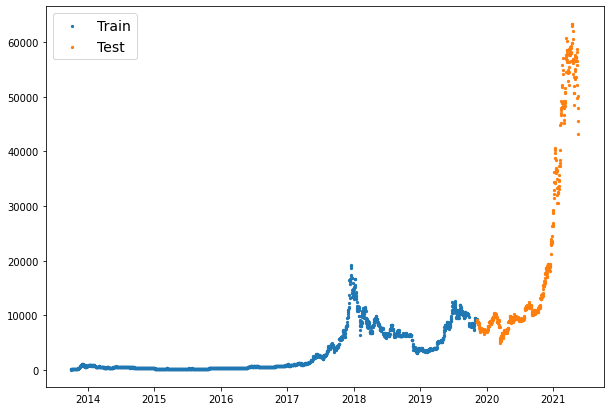

In [22]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "Train")
plt.scatter(x_test,y_test,s = 5,label = "Test")
plt.legend(fontsize = 14)

### Creating plot functions

In [23]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

## Model 0 - Naive Baselline

In [24]:
naive_forecast = y_test[:-1]

In [25]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [26]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

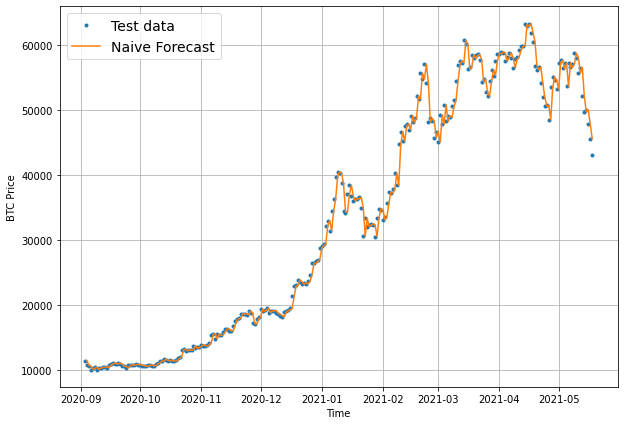

In [27]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive Forecast")

In [28]:
import tensorflow as tf

In [29]:
# MASE Implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_true = y_test[1:],y_pred = naive_forecast).numpy()

0.9995699939182624

In [31]:
def evaluation_metrics(y_pred,y_true):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  return {"mae":mae.numpy(),"mse":mse.numpy(),"rmse":rmse.numpy(),"mape":mape.numpy(),"mase":mase.numpy()}


In [32]:
naive_results = evaluation_metrics(y_test[1:],naive_forecast)

In [33]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.527042,
 'mase': 1.0060278}

In [34]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [35]:
tf.reduce_min(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>

## Windowing dataset

In [36]:
HORIZON = 1 #Predict 1 Day
WINDOW = 7 #Use past week of Bitcoin data to one predictor


In [37]:
def get_labelled_window(x,horizon = HORIZON):
  '''
    Create Labels for windowed dataset.
    E.g. If Horizon = 1
    Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6] -> [7]) Window Size = 7
  '''
  return x[:,:-horizon],x[:,-horizon:]

In [38]:
test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis = 0))

In [39]:
tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [40]:
print("Window : {x} -> Label: {y}".format(x = tf.squeeze(test_window).numpy(),y = tf.squeeze(test_label).numpy()))

Window : [1 2 3 4 5 6 7] -> Label: 8


## Preprocessing Functions for Windowed Data

In [41]:
import numpy as np

In [42]:
def make_windows(x,window_size =  WINDOW,horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis = 0).T
  windowed_array = x[window_indexes]
  
  windows,labels = get_labelled_window(windowed_array,horizon = HORIZON)
  return windows,labels

In [43]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW,horizon = HORIZON)

In [44]:
for i in range(3):
  print(full_windows[i],"->",full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


## Turning windows into Training and Test Sets

In [45]:
def make_train_test_splits(windows,labels,test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [46]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

## Making modelling checkpoint

In [47]:
import os
def create_model_checkpoint(model_name,save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose=0,save_best_only = True)

## Model 1 - Dense Model

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [49]:
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

model_1.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [50]:
history_1 = model_1.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2659.8792 - mae: 2659.8792  

18/18 [==============================] - 8s 89ms/step - loss: 2060.4875 - mae: 2060.4875 - val_loss: 1055.3931 - val_mae: 1055.3931
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 396.9799 - mae: 396.9799 - val_loss: 2084.2952 - val_mae: 2084.2952
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 235.0184 - mae: 235.0184 - val_loss: 1123.7473 - val_mae: 1123.7473
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 175.1958 - mae: 175.1958

18/18 [==============================] - 1s 49ms/step - loss: 174.3250 - mae: 174.3250 - val_loss: 977.8735 - val_mae: 977.8735
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 167.1553 - mae: 167.1553

18/18 [==============================] - 2s 113ms/step - loss: 165.2035 - mae: 165.2035 - val_loss: 919.7391 - val_mae: 919.7391
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 160.2126 - mae: 160.2126

18/18 [==============================] - 1s 55ms/step - loss: 162.8330 - mae: 162.8330 - val_loss: 906.7897 - val_mae: 906.7897
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 158.0173 - mae: 158.0173 - val_loss: 917.3660 - val_mae: 917.3660
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 156.3817 - mae: 156.3817

18/18 [==============================] - 1s 46ms/step - loss: 155.0258 - mae: 155.0258 - val_loss: 853.9766 - val_mae: 853.9766
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 153.7304 - mae: 153.7304 - val_loss: 878.1197 - val_mae: 878.1197
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 148.5418 - mae: 148.5418

18/18 [==============================] - 1s 48ms/step - loss: 150.9729 - mae: 150.9729 - val_loss: 838.8775 - val_mae: 838.8775
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 154.3667 - mae: 154.3667

18/18 [==============================] - 1s 41ms/step - loss: 146.4923 - mae: 146.4923 - val_loss: 810.6069 - val_mae: 810.6069
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 141.7471 - mae: 141.7471 - val_loss: 851.4507 - val_mae: 851.4507
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 140.2740 - mae: 140.2740 - val_loss: 814.0427 - val_mae: 814.0427
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 141.2945 - mae: 141.2945

18/18 [==============================] - 1s 43ms/step - loss: 138.1642 - mae: 138.1642 - val_loss: 779.0027 - val_mae: 779.0027
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4570 - mae: 136.4570

18/18 [==============================] - 1s 42ms/step - loss: 135.1425 - mae: 135.1425 - val_loss: 756.2436 - val_mae: 756.2436
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0736 - mae: 132.0736 - val_loss: 763.7763 - val_mae: 763.7763
Epoch 17/100
18/18 [==============================] - 0s 13ms/step - loss: 131.4751 - mae: 131.4751 - val_loss: 779.7615 - val_mae: 779.7615
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 132.1994 - mae: 132.1994 - val_loss: 768.2700 - val_mae: 768.2700
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 127.3631 - mae: 127.3631 - val_loss: 770.4301 - val_mae: 770.4301
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3054 - mae: 139.3054

18/18 [==============================] - 1s 46ms/step - loss: 127.1162 - mae: 127.1162 - val_loss: 696.2664 - val_mae: 696.2664
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 128.4197 - mae: 128.4197 - val_loss: 717.6129 - val_mae: 717.6129
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 131.2512 - mae: 131.2512

18/18 [==============================] - 1s 47ms/step - loss: 123.1522 - mae: 123.1522 - val_loss: 694.8328 - val_mae: 694.8328
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 120.6132 - mae: 120.6132

18/18 [==============================] - 1s 37ms/step - loss: 123.9461 - mae: 123.9461 - val_loss: 680.0271 - val_mae: 680.0271
Epoch 24/100
10/18 [===============>..............] - ETA: 0s - loss: 118.8801 - mae: 118.8801

18/18 [==============================] - 1s 72ms/step - loss: 121.8229 - mae: 121.8229 - val_loss: 665.1851 - val_mae: 665.1851
Epoch 25/100
18/18 [==============================] - 0s 10ms/step - loss: 121.5434 - mae: 121.5434 - val_loss: 668.7623 - val_mae: 668.7623
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 122.4156 - mae: 122.4156

18/18 [==============================] - 1s 69ms/step - loss: 122.4156 - mae: 122.4156 - val_loss: 654.0560 - val_mae: 654.0560
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 119.5487 - mae: 119.5487

18/18 [==============================] - 1s 70ms/step - loss: 119.8525 - mae: 119.8525 - val_loss: 649.6464 - val_mae: 649.6464
Epoch 28/100
18/18 [==============================] - 0s 14ms/step - loss: 118.1667 - mae: 118.1667 - val_loss: 654.1876 - val_mae: 654.1876
Epoch 29/100
18/18 [==============================] - 0s 13ms/step - loss: 120.0695 - mae: 120.0695 - val_loss: 660.4678 - val_mae: 660.4678
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 122.0863 - mae: 122.0863

18/18 [==============================] - 1s 60ms/step - loss: 121.4792 - mae: 121.4792 - val_loss: 638.6309 - val_mae: 638.6309
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 116.3115 - mae: 116.3115 - val_loss: 663.8690 - val_mae: 663.8690
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 116.2972 - mae: 116.2972 - val_loss: 645.2679 - val_mae: 645.2679
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 115.9028 - mae: 115.9028 - val_loss: 666.8186 - val_mae: 666.8186
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 120.8776 - mae: 120.8776

18/18 [==============================] - 1s 43ms/step - loss: 116.1608 - mae: 116.1608 - val_loss: 624.1863 - val_mae: 624.1863
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 104.4017 - mae: 104.4017

18/18 [==============================] - 1s 65ms/step - loss: 114.9222 - mae: 114.9222 - val_loss: 621.6820 - val_mae: 621.6820
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9685 - mae: 116.9685

18/18 [==============================] - 1s 53ms/step - loss: 117.3393 - mae: 117.3393 - val_loss: 619.0078 - val_mae: 619.0078
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9788 - mae: 114.9788 - val_loss: 667.6230 - val_mae: 667.6230
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2475 - mae: 117.2475 - val_loss: 632.2854 - val_mae: 632.2854
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 118.1424 - mae: 118.1424

18/18 [==============================] - 0s 29ms/step - loss: 116.2706 - mae: 116.2706 - val_loss: 615.6168 - val_mae: 615.6168
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.5579 - mae: 103.5579

18/18 [==============================] - 0s 28ms/step - loss: 113.1030 - mae: 113.1030 - val_loss: 614.8087 - val_mae: 614.8087
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8817 - mae: 113.8817 - val_loss: 618.0871 - val_mae: 618.0871
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7197 - mae: 118.7197 - val_loss: 641.2854 - val_mae: 641.2854
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4885 - mae: 116.4885 - val_loss: 642.6014 - val_mae: 642.6014
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 70.6128 - mae: 70.6128

18/18 [==============================] - 0s 28ms/step - loss: 116.6718 - mae: 116.6718 - val_loss: 614.3090 - val_mae: 614.3090
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 82.1246 - mae: 82.1246

18/18 [==============================] - 1s 30ms/step - loss: 112.3826 - mae: 112.3826 - val_loss: 612.5835 - val_mae: 612.5835
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1998 - mae: 112.1998 - val_loss: 629.1688 - val_mae: 629.1688
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9089 - mae: 114.9089 - val_loss: 703.8731 - val_mae: 703.8731
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 115.3073 - mae: 115.3073

18/18 [==============================] - 0s 27ms/step - loss: 113.1233 - mae: 113.1233 - val_loss: 599.8705 - val_mae: 599.8705
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8247 - mae: 112.8247 - val_loss: 652.2009 - val_mae: 652.2009
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9361 - mae: 118.9361 - val_loss: 610.7152 - val_mae: 610.7152
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3409 - mae: 113.3409 - val_loss: 614.2273 - val_mae: 614.2273
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 119.4772 - mae: 119.4772

18/18 [==============================] - 1s 31ms/step - loss: 111.7585 - mae: 111.7585 - val_loss: 596.5969 - val_mae: 596.5969
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 113.0189 - mae: 113.0189 - val_loss: 641.6577 - val_mae: 641.6577
Epoch 54/100
13/18 [====================>.........] - ETA: 0s - loss: 111.0875 - mae: 111.0875

18/18 [==============================] - 1s 45ms/step - loss: 112.8009 - mae: 112.8009 - val_loss: 595.9059 - val_mae: 595.9059
Epoch 55/100
18/18 [==============================] - 0s 12ms/step - loss: 114.3001 - mae: 114.3001 - val_loss: 631.9073 - val_mae: 631.9073
Epoch 56/100
18/18 [==============================] - 0s 13ms/step - loss: 112.2830 - mae: 112.2830 - val_loss: 778.2341 - val_mae: 778.2340
Epoch 57/100
18/18 [==============================] - 0s 12ms/step - loss: 123.0201 - mae: 123.0201 - val_loss: 611.4517 - val_mae: 611.4517
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 122.1990 - mae: 122.1990

18/18 [==============================] - 1s 55ms/step - loss: 122.3390 - mae: 122.3390 - val_loss: 594.9688 - val_mae: 594.9688
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5000 - mae: 112.5000 - val_loss: 595.2565 - val_mae: 595.2565
Epoch 60/100
18/18 [==============================] - 0s 13ms/step - loss: 110.6152 - mae: 110.6152 - val_loss: 620.3141 - val_mae: 620.3141
Epoch 61/100
13/18 [====================>.........] - ETA: 0s - loss: 112.0260 - mae: 112.0260

18/18 [==============================] - 1s 48ms/step - loss: 112.3910 - mae: 112.3910 - val_loss: 590.1398 - val_mae: 590.1398
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9682 - mae: 108.9682 - val_loss: 593.4091 - val_mae: 593.4091
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0766 - mae: 114.0766 - val_loss: 633.3093 - val_mae: 633.3093
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3257 - mae: 110.3257 - val_loss: 647.9521 - val_mae: 647.9521
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 137.4203 - mae: 137.4203

18/18 [==============================] - 0s 28ms/step - loss: 112.2198 - mae: 112.2198 - val_loss: 587.8606 - val_mae: 587.8606
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3766 - mae: 111.3766

18/18 [==============================] - 0s 27ms/step - loss: 108.5753 - mae: 108.5753 - val_loss: 586.3032 - val_mae: 586.3032
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9696 - mae: 108.9696 - val_loss: 649.3134 - val_mae: 649.3134
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1436 - mae: 116.1436 - val_loss: 692.4813 - val_mae: 692.4813
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 132.6020 - mae: 132.6020 - val_loss: 662.9556 - val_mae: 662.9556
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 136.5399 - mae: 136.5399 - val_loss: 642.8605 - val_mae: 642.8605
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 116.0337 - mae: 116.0337 - val_loss: 624.2720 - val_mae: 624.2720
Epoch 72/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0282 - mae: 110.0282 - val_loss: 586.3386 - val_mae: 586.3386
Epoch 73/100
18/18 [============

18/18 [==============================] - 1s 58ms/step - loss: 110.4682 - mae: 110.4682 - val_loss: 582.6970 - val_mae: 582.6970
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6462 - mae: 110.6462 - val_loss: 614.9139 - val_mae: 614.9139
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 114.5942 - mae: 114.5942

18/18 [==============================] - 1s 35ms/step - loss: 111.3434 - mae: 111.3434 - val_loss: 581.9670 - val_mae: 581.9670
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 85.0922 - mae: 85.0922

18/18 [==============================] - 0s 28ms/step - loss: 109.7467 - mae: 109.7467 - val_loss: 581.6544 - val_mae: 581.6544
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 108.9497 - mae: 108.9497

18/18 [==============================] - 1s 45ms/step - loss: 112.3093 - mae: 112.3093 - val_loss: 581.1041 - val_mae: 581.1041
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8104 - mae: 111.8104 - val_loss: 584.5922 - val_mae: 584.5922
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9038 - mae: 108.9038 - val_loss: 599.9161 - val_mae: 599.9161
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4413 - mae: 108.4413 - val_loss: 587.9060 - val_mae: 587.9060
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2808 - mae: 119.2808 - val_loss: 594.6102 - val_mae: 594.6102
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9726 - mae: 113.9726 - val_loss: 675.3500 - val_mae: 675.3500
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0973 - mae: 114.0973 - val_loss: 598.8115 - val_mae: 598.8115
Epoch 85/100
18/18 [============

18/18 [==============================] - 0s 27ms/step - loss: 110.6512 - mae: 110.6512 - val_loss: 577.3099 - val_mae: 577.3099
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0326 - mae: 108.0326 - val_loss: 593.5432 - val_mae: 593.5432
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8092 - mae: 111.8092 - val_loss: 590.7502 - val_mae: 590.7502
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9655 - mae: 111.9655 - val_loss: 578.6026 - val_mae: 578.6026
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5260 - mae: 117.5260 - val_loss: 637.9981 - val_mae: 637.9981
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6623 - mae: 113.6623 - val_loss: 619.5168 - val_mae: 619.5168
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 141.3224 - mae: 141.3224

18/18 [==============================] - 1s 38ms/step - loss: 108.9605 - mae: 108.9605 - val_loss: 576.1630 - val_mae: 576.1630
Epoch 96/100
18/18 [==============================] - 0s 11ms/step - loss: 114.6142 - mae: 114.6142 - val_loss: 662.2930 - val_mae: 662.2930
Epoch 97/100
12/18 [===================>..........] - ETA: 0s - loss: 114.7244 - mae: 114.7244

18/18 [==============================] - 1s 58ms/step - loss: 113.3559 - mae: 113.3559 - val_loss: 575.8093 - val_mae: 575.8093
Epoch 98/100
14/18 [======================>.......] - ETA: 0s - loss: 111.6779 - mae: 111.6779

18/18 [==============================] - 1s 70ms/step - loss: 109.3441 - mae: 109.3441 - val_loss: 575.6700 - val_mae: 575.6700
Epoch 99/100
14/18 [======================>.......] - ETA: 0s - loss: 103.8844 - mae: 103.8844

18/18 [==============================] - 2s 113ms/step - loss: 107.8947 - mae: 107.8947 - val_loss: 575.5392 - val_mae: 575.5392
Epoch 100/100
18/18 [==============================] - 0s 20ms/step - loss: 117.0198 - mae: 117.0198 - val_loss: 703.2610 - val_mae: 703.2610


In [51]:
model_1_results = model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 703.2611 - mae: 703.2611


In [52]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [53]:
model_1_preds = make_preds(model_1,test_windows)

18/18 [==============================] - 0s 4ms/step


In [54]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_1_preds)

{'mae': 703.261,
 'mse': 1477270.5,
 'rmse': 1215.4302,
 'mape': 3.232016,
 'mase': 1.2354348}

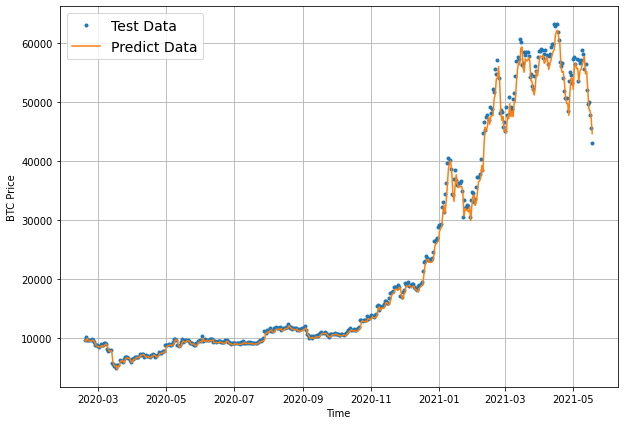

In [55]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_1_preds,start = offset,label = "Predict Data",format = "-")

## Model 2: Dense(Window = 30,Horizon = 1)

In [56]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 1)

In [57]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [58]:
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(1,activation = "linear"),
],name = "model_2_dense")
model_2.compile(loss = "mae",metrics = ["mae"],optimizer = "adam")

In [59]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1084.8414 - mae: 1084.8414 

18/18 [==============================] - 2s 34ms/step - loss: 1084.8414 - mae: 1084.8414 - val_loss: 3589.8555 - val_mae: 3589.8555
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 606.0447 - mae: 606.0447

18/18 [==============================] - 0s 26ms/step - loss: 356.3867 - mae: 356.3867 - val_loss: 1787.6481 - val_mae: 1787.6481
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 266.6141 - mae: 266.6141

18/18 [==============================] - 1s 39ms/step - loss: 266.6141 - mae: 266.6141 - val_loss: 1374.6714 - val_mae: 1374.6714
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 235.1700 - mae: 235.1700

18/18 [==============================] - 0s 26ms/step - loss: 235.1700 - mae: 235.1700 - val_loss: 1198.7421 - val_mae: 1198.7421
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 144.1513 - mae: 144.1513

18/18 [==============================] - 0s 27ms/step - loss: 208.0132 - mae: 208.0132 - val_loss: 1106.1788 - val_mae: 1106.1788
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 233.6927 - mae: 233.6927

18/18 [==============================] - 0s 27ms/step - loss: 196.0696 - mae: 196.0696 - val_loss: 1016.2020 - val_mae: 1016.2020
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 180.2533 - mae: 180.2533

18/18 [==============================] - 1s 31ms/step - loss: 180.2533 - mae: 180.2533 - val_loss: 977.9404 - val_mae: 977.9404
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 165.5162 - mae: 165.5162

18/18 [==============================] - 0s 26ms/step - loss: 168.7599 - mae: 168.7599 - val_loss: 936.2937 - val_mae: 936.2937
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 164.8521 - mae: 164.8521 - val_loss: 946.1010 - val_mae: 946.1010
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 161.4129 - mae: 161.4129 - val_loss: 1005.7662 - val_mae: 1005.7662
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 165.0188 - mae: 165.0188 - val_loss: 944.6548 - val_mae: 944.6548
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2495 - mae: 125.2495

18/18 [==============================] - 0s 27ms/step - loss: 158.3154 - mae: 158.3154 - val_loss: 897.1113 - val_mae: 897.1113
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 150.3797 - mae: 150.3797 - val_loss: 1057.4675 - val_mae: 1057.4675
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 158.4941 - mae: 158.4941 - val_loss: 971.4024 - val_mae: 971.4024
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 163.0444 - mae: 163.0444 - val_loss: 982.7913 - val_mae: 982.7913
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 162.4107 - mae: 162.4107 - val_loss: 1057.0652 - val_mae: 1057.0652
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 152.6246 - mae: 152.6246 - val_loss: 936.5558 - val_mae: 936.5558
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 143.2284 - mae: 143.2284

18/18 [==============================] - 0s 28ms/step - loss: 143.3316 - mae: 143.3316 - val_loss: 819.5333 - val_mae: 819.5333
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 139.3109 - mae: 139.3109 - val_loss: 845.2568 - val_mae: 845.2568
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 137.0848 - mae: 137.0848 - val_loss: 820.5760 - val_mae: 820.5760
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 151.2727 - mae: 151.2727

18/18 [==============================] - 0s 28ms/step - loss: 151.2727 - mae: 151.2727 - val_loss: 804.7014 - val_mae: 804.7014
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 120.0861 - mae: 120.0861

18/18 [==============================] - 0s 26ms/step - loss: 148.6289 - mae: 148.6289 - val_loss: 750.8112 - val_mae: 750.8112
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 136.0155 - mae: 136.0155 - val_loss: 891.8926 - val_mae: 891.8926
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 150.6386 - mae: 150.6386 - val_loss: 757.6198 - val_mae: 757.6198
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 146.5105 - mae: 146.5105 - val_loss: 784.8858 - val_mae: 784.8858
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2184 - mae: 125.2184

18/18 [==============================] - 0s 26ms/step - loss: 137.0258 - mae: 137.0258 - val_loss: 731.5775 - val_mae: 731.5775
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 92.4436 - mae: 92.4436

18/18 [==============================] - 0s 27ms/step - loss: 138.6285 - mae: 138.6285 - val_loss: 717.2532 - val_mae: 717.2532
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 130.9882 - mae: 130.9882 - val_loss: 793.0057 - val_mae: 793.0057
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 130.9241 - mae: 130.9241 - val_loss: 938.2195 - val_mae: 938.2196
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 142.0401 - mae: 142.0401 - val_loss: 806.2129 - val_mae: 806.2129
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 139.0762 - mae: 139.0762

18/18 [==============================] - 0s 27ms/step - loss: 139.0762 - mae: 139.0762 - val_loss: 693.2088 - val_mae: 693.2088
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0312 - mae: 125.0312 - val_loss: 907.0571 - val_mae: 907.0571
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 125.6671 - mae: 125.6671 - val_loss: 736.3521 - val_mae: 736.3521
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 124.2877 - mae: 124.2877

18/18 [==============================] - 1s 40ms/step - loss: 126.7481 - mae: 126.7481 - val_loss: 678.1724 - val_mae: 678.1724
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 127.0581 - mae: 127.0581 - val_loss: 691.9441 - val_mae: 691.9441
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 134.9036 - mae: 134.9036 - val_loss: 796.9605 - val_mae: 796.9605
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 132.8746 - mae: 132.8746 - val_loss: 797.3975 - val_mae: 797.3975
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 159.1771 - mae: 159.1771

18/18 [==============================] - 1s 39ms/step - loss: 156.0435 - mae: 156.0435 - val_loss: 662.6496 - val_mae: 662.6496
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 148.7694 - mae: 148.7694 - val_loss: 762.6047 - val_mae: 762.6047
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 137.1156 - mae: 137.1156 - val_loss: 1050.6257 - val_mae: 1050.6257
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 141.5314 - mae: 141.5314 - val_loss: 720.7742 - val_mae: 720.7742
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 131.1301 - mae: 131.1301

18/18 [==============================] - 1s 30ms/step - loss: 129.4974 - mae: 129.4974 - val_loss: 657.7812 - val_mae: 657.7812
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6837 - mae: 117.6837 - val_loss: 725.7520 - val_mae: 725.7520
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2819 - mae: 136.2819

18/18 [==============================] - 1s 43ms/step - loss: 129.1518 - mae: 129.1518 - val_loss: 654.5771 - val_mae: 654.5771
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 107.5472 - mae: 107.5472

18/18 [==============================] - 0s 27ms/step - loss: 123.5408 - mae: 123.5408 - val_loss: 647.2130 - val_mae: 647.2130
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 121.2449 - mae: 121.2449 - val_loss: 682.5718 - val_mae: 682.5718
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 125.2505 - mae: 125.2505

18/18 [==============================] - 0s 27ms/step - loss: 119.4259 - mae: 119.4259 - val_loss: 641.7026 - val_mae: 641.7026
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 117.5549 - mae: 117.5549 - val_loss: 707.4285 - val_mae: 707.4285
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 132.7436 - mae: 132.7436 - val_loss: 701.4918 - val_mae: 701.4918
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 130.6156 - mae: 130.6156 - val_loss: 1003.1995 - val_mae: 1003.1995
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 140.3030 - mae: 140.3030 - val_loss: 1199.1613 - val_mae: 1199.1613
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 146.8562 - mae: 146.8562 - val_loss: 725.0318 - val_mae: 725.0318
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 134.5218 - mae: 134.5218 - val_loss: 852.1313 - val_mae: 852.1313
Epoch 54/100
18/18 [========

18/18 [==============================] - 0s 27ms/step - loss: 146.8888 - mae: 146.8888 - val_loss: 620.6010 - val_mae: 620.6010
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4590 - mae: 118.4590 - val_loss: 631.0750 - val_mae: 631.0750
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 123.9532 - mae: 123.9532 - val_loss: 643.4289 - val_mae: 643.4289
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9382 - mae: 115.9382 - val_loss: 834.1054 - val_mae: 834.1054
Epoch 63/100
15/18 [========================>.....] - ETA: 0s - loss: 123.2444 - mae: 123.2444

18/18 [==============================] - 1s 47ms/step - loss: 124.6243 - mae: 124.6243 - val_loss: 617.7315 - val_mae: 617.7315
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 115.3956 - mae: 115.3956 - val_loss: 618.8936 - val_mae: 618.8936
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8702 - mae: 114.8702 - val_loss: 697.8939 - val_mae: 697.8939
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 125.5718 - mae: 125.5718

18/18 [==============================] - 1s 33ms/step - loss: 120.0958 - mae: 120.0958 - val_loss: 611.1752 - val_mae: 611.1752
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7058 - mae: 119.7058 - val_loss: 649.1570 - val_mae: 649.1570
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 122.9049 - mae: 122.9049 - val_loss: 633.3000 - val_mae: 633.3000
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 123.4160 - mae: 123.4160 - val_loss: 775.9338 - val_mae: 775.9338
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 126.1434 - mae: 126.1434 - val_loss: 805.4074 - val_mae: 805.4074
Epoch 71/100
18/18 [==============================] - 0s 14ms/step - loss: 123.1304 - mae: 123.1304 - val_loss: 630.4478 - val_mae: 630.4478
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 115.9730 - mae: 115.9730 - val_loss: 742.6295 - val_mae: 742.6295
Epoch 73/100
18/18 [==========

18/18 [==============================] - 1s 40ms/step - loss: 125.4446 - mae: 125.4446 - val_loss: 606.0984 - val_mae: 606.0984
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 121.3883 - mae: 121.3883 - val_loss: 683.3250 - val_mae: 683.3250
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3855 - mae: 115.3855

18/18 [==============================] - 1s 47ms/step - loss: 115.2984 - mae: 115.2984 - val_loss: 602.0187 - val_mae: 602.0187
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0346 - mae: 111.0346 - val_loss: 605.7650 - val_mae: 605.7650
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3377 - mae: 110.3377 - val_loss: 605.3574 - val_mae: 605.3574
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4004 - mae: 112.4004 - val_loss: 620.4002 - val_mae: 620.4002
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 113.1166 - mae: 113.1166 - val_loss: 724.7137 - val_mae: 724.7137
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 117.2316 - mae: 117.2316 - val_loss: 709.5264 - val_mae: 709.5264
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 120.2934 - mae: 120.2934 - val_loss: 610.1950 - val_mae: 610.1950
Epoch 87/100
18/18 [===========

18/18 [==============================] - 1s 36ms/step - loss: 114.3390 - mae: 114.3390 - val_loss: 600.7267 - val_mae: 600.7267
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3007 - mae: 113.3007 - val_loss: 628.2881 - val_mae: 628.2881
Epoch 98/100
 1/18 [>.............................] - ETA: 0s - loss: 110.8459 - mae: 110.8459

18/18 [==============================] - 0s 27ms/step - loss: 116.2359 - mae: 116.2359 - val_loss: 594.9418 - val_mae: 594.9418
Epoch 99/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0674 - mae: 113.0674 - val_loss: 609.6396 - val_mae: 609.6396
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 116.8373 - mae: 116.8373 - val_loss: 599.4924 - val_mae: 599.4924


In [61]:
model_2_preds = make_preds(model_2,test_windows)

18/18 [==============================] - 0s 2ms/step


In [62]:
evaluation_metrics(y_true = tf.squeeze(test_labels),y_pred=model_2_preds)

{'mae': 599.4924,
 'mse': 1246510.9,
 'rmse': 1116.4725,
 'mape': 2.7470825,
 'mase': 1.0479186}

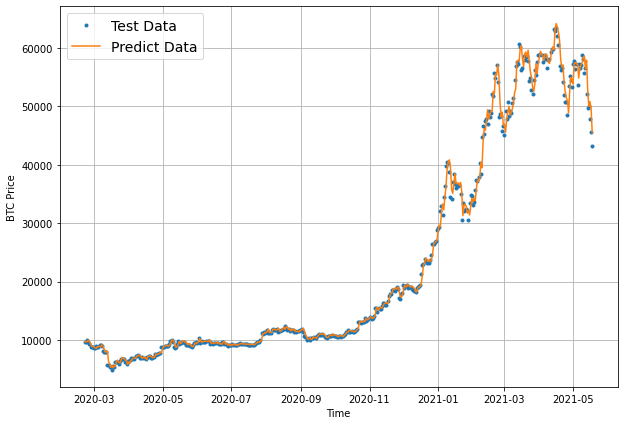

In [63]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_2_preds,start = offset,label = "Predict Data",format = "-")

## Model 3: Dense(Windows = 30,Horizon = 7)

In [65]:
full_windows,full_labels = make_windows(prices,window_size = 30,horizon = 7)

In [66]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [83]:
model_3 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(7),
],name = "model_3_dense")
model_3.compile(loss = "mae",optimizer = "adam")

In [84]:
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 0,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

In [85]:
model_3_preds = make_preds(model_3,test_windows)

18/18 [==============================] - 0s 2ms/step


In [86]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8852.667 , 8699.696 , 8656.29  , 8591.557 , 8584.814 , 8664.937 ,
        8662.835 ],
       [8727.19  , 8686.993 , 8626.192 , 8588.332 , 8577.914 , 8431.602 ,
        8568.037 ],
       [8633.111 , 8541.984 , 8563.259 , 8581.484 , 8447.621 , 8210.062 ,
        8571.734 ],
       [8452.41  , 8362.632 , 8275.361 , 8512.724 , 8321.44  , 8273.2295,
        8463.06  ],
       [8325.386 , 8283.278 , 8116.943 , 8325.762 , 8185.828 , 8223.06  ,
        8441.724 ]], dtype=float32)>

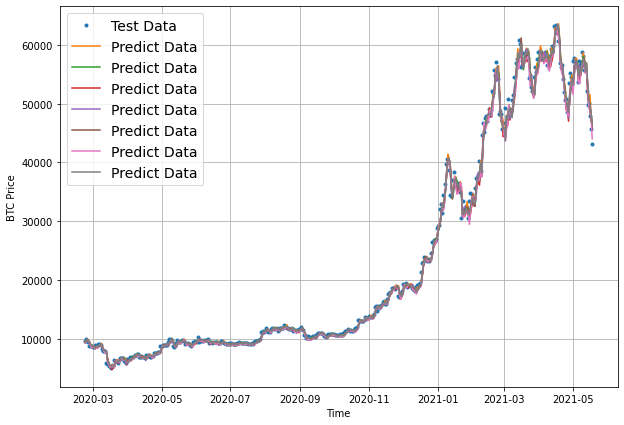

In [88]:
offset = 100
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "Test Data")
plot_time_series(timesteps = x_test[-len(test_windows):],values = model_3_preds,start = offset,label = "Predict Data",format = "-")